In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd


In [2]:
df=pd.DataFrame({'Name':['A','B','C','D','E','F','G','H','I','J','k','l','m','n','o','p','q','r','s','t'],
                'Age':[19,22,24,28,29,35,24,27,33,20,24,32,34,38,39,15,44,57,63,17],
                'Income':[10,15,8,63,72,57,25,76,80,17,19,55,58,63,72,7,45,76,80,9]})
df

,Name,Age,Income
0,A,19,10
1,B,22,15
2,C,24,8
3,D,28,63
4,E,29,72
5,F,35,57
6,G,24,25
7,H,27,76
8,I,33,80
9,J,20,17


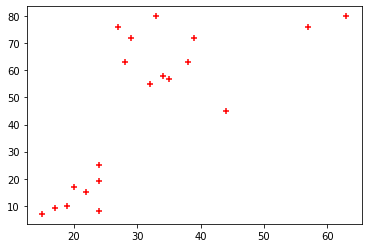

In [3]:
plt.scatter(df['Age'],df['Income'],color='red',marker='+')

In [5]:
km=KMeans(n_clusters=2)
y_predicted=km.fit_predict(df[['Age','Income']])
y_predicted
df['Cluster']=y_predicted
df

,Name,Age,Income,Cluster
0,A,19,10,0
1,B,22,15,0
2,C,24,8,0
3,D,28,63,1
4,E,29,72,1
5,F,35,57,1
6,G,24,25,0
7,H,27,76,1
8,I,33,80,1
9,J,20,17,0


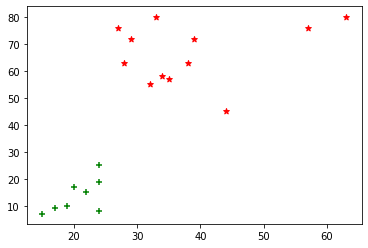

In [6]:
df1=df[df.Cluster==0]
df1
df2=df[df.Cluster==1]
df2
df3=df[df.Cluster==2]
df3
plt.scatter(df1.Age,df1.Income,color='green',marker='+')
plt.scatter(df2.Age,df2.Income,color='red',marker='*')
plt.scatter(df3.Age,df3.Income,color='orange')


In [7]:
scaler=MinMaxScaler()
scaler.fit(df[['Income']])
df['Income']=scaler.transform(df[['Income']])
df
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df
km=KMeans(n_clusters=3)
y_predicted=km.fit_predict(df[['Age','Income']])
y_predicted

array([1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 0, 0, 1])

In [8]:
km.cluster_centers_

array([[0.9375    , 0.97260274],
       [0.1171875 , 0.09246575],
       [0.39375   , 0.78219178]])

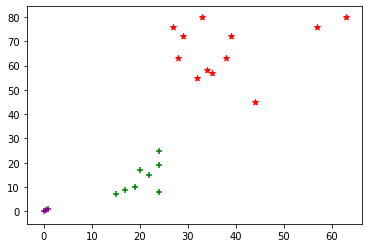

In [9]:
plt.scatter(df1.Age,df1.Income,color='green',marker='+')
plt.scatter(df2.Age,df2.Income,color='red',marker='*')
plt.scatter(df3.Age,df3.Income,color='orange')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='+')

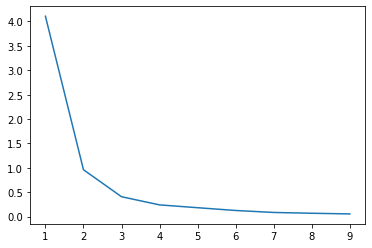

In [11]:
k_val=range(1,10)
sse = []
for k in k_val:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income']])
    sse.append(km.inertia_)

sse
plt.plot(k_val,sse)
